In [1]:
import sys
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from load_json import *
from PDF import *

In [2]:
# Loading disruption data
path_disr = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\DB_TCV_DISR.json'
data_disr = load_json(path_disr)

In [6]:
# Loading shot data
path_shot = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\TCV_DATAno63847.parquet'
data_shot = pd.read_parquet(path_shot, engine='fastparquet')

In [7]:
# Loading time series
t = data_shot['time']
FIR_core = data_shot['FIR_core']
PD = data_shot['PD']
DML = data_shot['DML']
IP = data_shot['IP']
data_shot.keys()

Index(['time', 'FIR_core', 'PD', 'DML', 'IP'], dtype='object')

In [8]:
# Finding t_flattop: time where flattop starts and t_disr: time of disruption
IP_segments = data_disr['no63847']['Discharge']['IP_segments']
t_flattop = IP_segments['Flat_top'][0]
t_disr = data_disr['no63847']['Disruptions']['tD']

# Cutting the FIR values at beginning of flat top and at disruption
FIR_cutted, t_cutted = Edward(FIR_core, t, [t_flattop, t_disr])

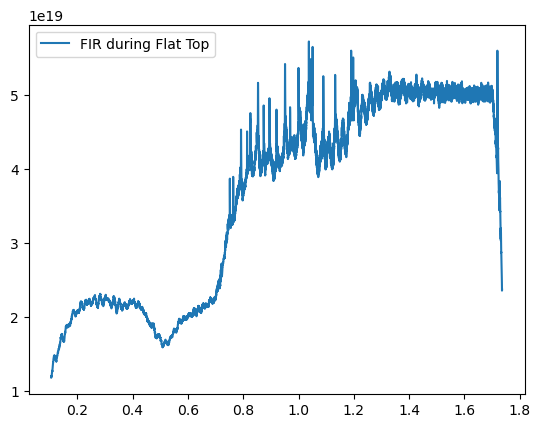

In [12]:
# Plotting FIR during flat top
ind = 1
plt.plot(t_cutted[ind], FIR_cutted[ind], label = 'FIR during Flat Top')
plt.legend()
plt.savefig('FIR_Flat_Top.png', dpi=369)

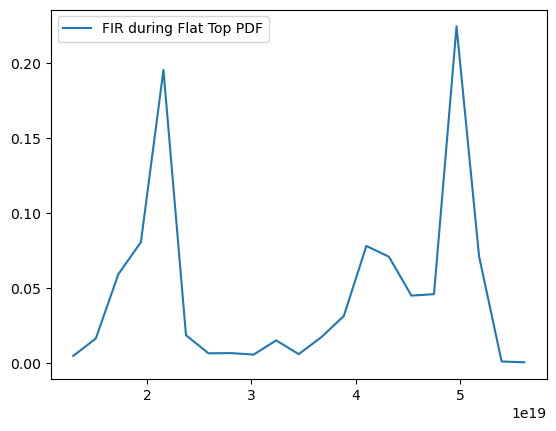

In [32]:
# Making pdf of FIR during flat top
(hist, bin_centers), scaling = PDF(FIR_cutted[ind])
plt.plot(bin_centers, hist, label = 'FIR during Flat Top PDF')
plt.legend()
plt.savefig('FIR_Flat_Top PDF.png', dpi=369)

In [9]:
print_dict_structure(data_disr)

- no63847: dict
  - Disruptions: dict
    - tD: float
    - CQ_rates_tD: dict
      - delta100_10: float
      - delta100_70: float
      - delta100_40: float
      - delta90_70: float
      - delta90_40: float
      - delta90_10: float
      - delta80_20: float
      - delta50_20: float
    - CQ_currents_tD: list
    - CS_amplitude_tD: float
    - CQ_delta: dict
      - delta100_10: float
      - delta100_70: float
      - delta100_40: float
      - delta90_70: float
      - delta90_40: float
      - delta90_10: float
      - delta80_20: float
      - delta50_20: float
    - CQ_S_delta: dict
      - delta100_10: float
      - delta100_70: float
      - delta100_40: float
      - delta90_70: float
      - delta90_40: float
      - delta90_10: float
      - delta80_20: float
      - delta50_20: float
    - CQ_SL_delta: dict
      - delta100_10: float
      - delta100_70: float
      - delta100_40: float
      - delta90_70: float
      - delta90_40: float
      - delta90_10: float
      

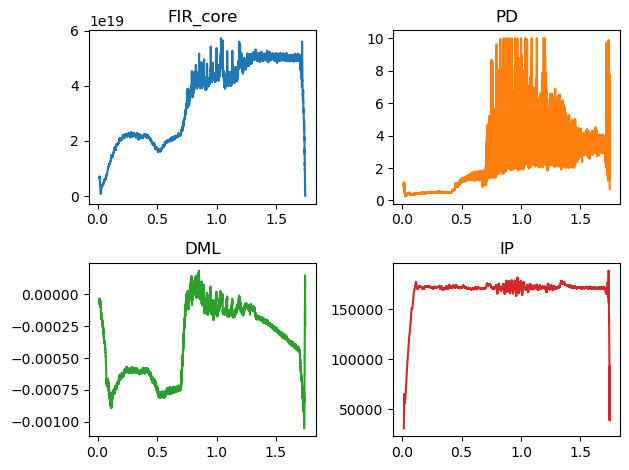

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, FIR_core)
axs[0, 0].set_title('FIR_core')
axs[0, 1].plot(t, PD, 'tab:orange')
axs[0, 1].set_title('PD')
axs[1, 0].plot(t, DML, 'tab:green')
axs[1, 0].set_title('DML')
axs[1, 1].plot(t, IP, 'tab:red')
axs[1, 1].set_title('IP')
fig.tight_layout()